# Practice implementing the UCB, Thompson Sampling methods, and compare with simple EDA.

## Some exploratory data analysis (EDA) first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataset = pd.read_csv('data.csv')
display(dataset)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [3]:
dataset.describe()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,0.170300,0.129500,0.072800,0.119600,0.269500,0.012600,0.111200,0.209100,0.095200,0.04890
std,0.375915,0.335769,0.259821,0.324509,0.443722,0.111546,0.314395,0.406686,0.293506,0.21567
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Ad 1    10000 non-null  int64
 1   Ad 2    10000 non-null  int64
 2   Ad 3    10000 non-null  int64
 3   Ad 4    10000 non-null  int64
 4   Ad 5    10000 non-null  int64
 5   Ad 6    10000 non-null  int64
 6   Ad 7    10000 non-null  int64
 7   Ad 8    10000 non-null  int64
 8   Ad 9    10000 non-null  int64
 9   Ad 10   10000 non-null  int64
dtypes: int64(10)
memory usage: 781.4 KB


In [5]:
dataset.sum()

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

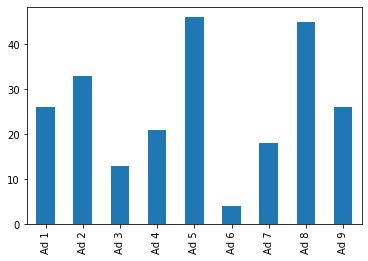

In [6]:
dataset.iloc[0:200, :-1].sum().plot(kind='bar')
plt.show()

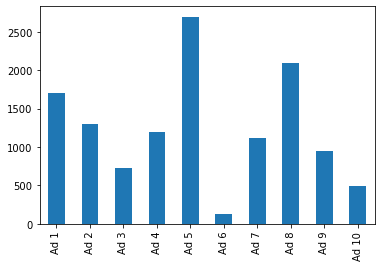

In [7]:
dataset.sum().plot(kind='bar')
plt.show()

The simple EDA is able to show that Ad 5 has the highest click rate via 200 user data.

## The Upper Confidence Bound (UCB) method

In [8]:
def ucb(N, d, dataset=dataset):
    ads_selected = []
    numbers_of_selections = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0
    for n in range(0, N):
        ad = 0
        max_upper_bound = 0
        for i in range(0, d):
            if (numbers_of_selections[i] > 0):
                average_reward = sums_of_rewards[i] / numbers_of_selections[i]
                delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400
            if (upper_bound > max_upper_bound):
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = dataset.values[n, ad]
        sums_of_rewards[ad] += reward
        total_reward += reward
    return ads_selected, sums_of_rewards, total_reward

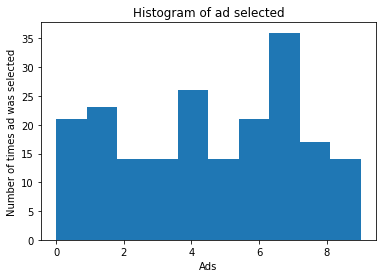

In [9]:
N = 200 #dataset.shape[0]
d = dataset.shape[1]
y = ucb(N, d, dataset)
ads_selected, sums_of_rewards, total_reward = y

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

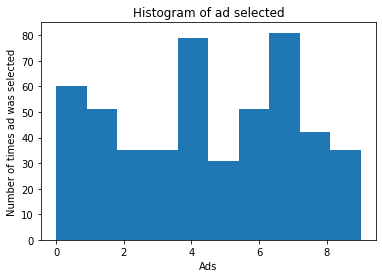

In [10]:
N = 500
d = dataset.shape[1]
y = ucb(N, d, dataset)
ads_selected, sums_of_rewards, total_reward = y

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

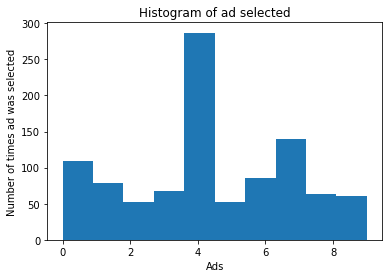

In [11]:
N = 1000
d = dataset.shape[1]
y = ucb(N, d, dataset)
ads_selected, sums_of_rewards, total_reward = y

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

The UCB method is able to pick out the optimal ad using 500+ users, but EDA is able to pick out the
winner using 200+ users, shall we say a simple EDA beats UCB ? :)

## The Thompson Sampling Method

In [12]:
import random
def thompson_s(N, d, dataset=dataset):
    ads_selected = []
    numbers_of_rewards_1 = [0] * d
    numbers_of_rewards_0 = [0] * d
    total_reward = 0
    for n in range(0, N):
        ad = 0
        max_random = 0
        for i in range(0, d):
            random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
            if (random_beta > max_random):
                max_random = random_beta
                ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        if reward == 1:
            numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
        else:
            numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        total_reward = total_reward + reward
    return ads_selected, total_reward

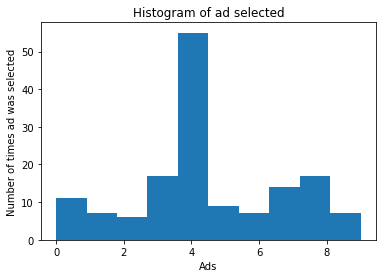

In [17]:
N = 150 # dataset.shape[0]
d = dataset.shape[1]
ads_selected, total_reward = thompson_s(N, d, dataset)

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

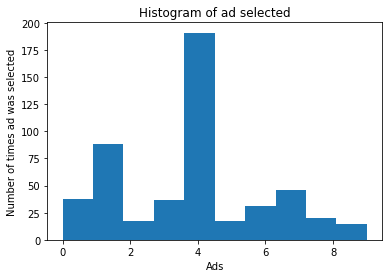

In [14]:
N = 500 # dataset.shape[0]
d = dataset.shape[1]
ads_selected, total_reward = thompson_s(N, d, dataset)

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

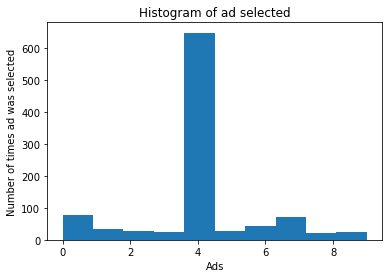

In [15]:
N = 1000 #dataset.shape[0]
d = dataset.shape[1]
ads_selected, total_reward = thompson_s(N, d, dataset)

plt.hist(ads_selected)
plt.title('Histogram of ad selected')
plt.xlabel('Ads')
plt.ylabel('Number of times ad was selected')
plt.show()

The Thompson method is able to pick out the optimal ad using 150 users with confidence. Definitely beats
both EDA and UCB. Hooray! 